In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df1 = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)), columns=list('abc'))
df2 = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)), columns=list('abc'))

In [3]:
df2

,a,b,c
0,0,1,1
1,1,0,1
2,0,1,1
3,1,0,1
4,1,0,0
5,1,0,1
6,0,1,0
7,1,0,1
8,1,0,0
9,1,1,0


In [4]:
df1

,a,b,c
0,1,1,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,1,1
5,1,1,1
6,0,0,1
7,0,0,1
8,0,1,1
9,0,1,0


In [5]:
def create_dictionary(df):
    dict = {}
    for i in range(len(df)):
        row = list(df.iloc[i,:])
        if f"{row}" in dict.keys():
            dict[f"{row}"] += 1
        else: 
            dict[f"{row}"] = 1
    return dict

In [6]:
dict

dict

In [7]:
dict2 = {}
for i in range(len(df1)):
    row = list(df1.iloc[i,:])
    if f"{row}" in dict2.keys():
        dict2[f"{row}"] += 1
    else: dict2[f"{row}"] = 1


In [8]:
dict2

{'[1, 1, 1]': 3,
 '[1, 1, 0]': 1,
 '[0, 0, 0]': 2,
 '[0, 0, 1]': 2,
 '[0, 1, 1]': 1,
 '[0, 1, 0]': 1}

In [9]:
def create_dictionary(df):
    dict = {}
    for i in range(len(df)):
        row = list(df.iloc[i,:])
        if f"{row}" in dict.keys():
            dict[f"{row}"] += 1
        else: 
            dict[f"{row}"] = 1
    return dict

def check_percentage(dict, dict2):
    count = 0
    for row,val in dict.items():
        for row2,val2 in dict2.items():
            if row == row2:
                count += min(val, val2)

    total_length = sum(dict.values())
    return count/total_length

def work_bitch(df1, df2):
    dict = create_dictionary(df1)
    dict2 = create_dictionary(df2)
    percentage = check_percentage(dict, dict2)
    return percentage * 100

In [10]:
work_bitch(df1, df2)

30.0

## SNAP & Displacement

In [11]:
# read text file into pandas DataFrame
X_gate_2_5 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(2,5).txt", sep=",")
X_gate_3_4 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(3,4).txt", sep=",")
X_gate_2_3_and_4_5 = pd.read_csv("../../data/X_gate/5_photons/SNAP_Disp/(2,3)_(4,5).txt", sep=",")

In [12]:
X_gate_2_5

,fidelity,N_blocks
0,0.081055,1
1,0.384149,1
2,0.384149,1
3,0.555556,1
4,0.555556,1
...,...,...
95,0.027051,5
96,0.005275,5
97,0.031963,5
98,0.003217,5


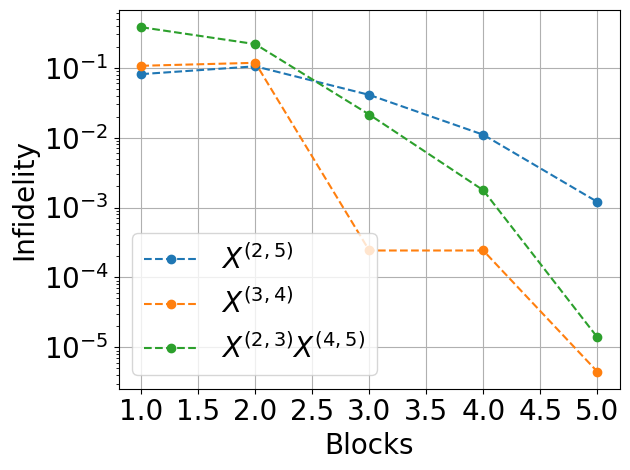

In [13]:
# plt.plot(X_gate_2_3.groupby(" N_blocks").mean()["fidelity"], label="(2,3)")
# plt.plot(X_gate_3_4.groupby(" N_blocks").mean()["fidelity"], label="(3,4)")
# plt.plot(X_gate_2_3_and_4_5.groupby(" N_blocks").mean()["fidelity"], label="[(2,3),(4,5)]")
plt.plot([1,2,3,4,5],X_gate_2_5.groupby(" N_blocks").min(), label=r"$X^{(2,5)}$", marker="o", linestyle='dashed')
plt.plot([1,2,3,4,5],X_gate_3_4.groupby("blocks").min(), label=r"$X^{(3,4)}$", marker="o", linestyle='dashed')
plt.plot([1,2,3,4,5],X_gate_2_3_and_4_5.groupby(" N_blocks").min(), label=r"$X^{(2,3)}X^{(4,5)}$", marker="o", linestyle='dashed')
plt.yscale("log")
plt.ylabel("Infidelity", fontsize=20)
plt.xlabel("Blocks", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()
plt.tight_layout()
plt.savefig("SNAP_DISP_STATE_DEPENDENCY.pdf")
plt.show()


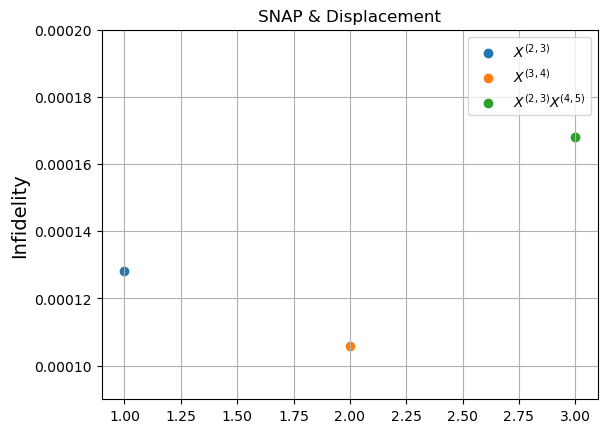

In [10]:
plt.scatter([1],0.00012812802525108413, label=r"$X^{(2,3)}$", marker="o")
plt.scatter([2],0.00010585119309025615, label=r"$X^{(3,4)}$", marker="o")
plt.scatter([3],0.00016809647285598306, label=r"$X^{(2,3)}X^{(4,5)}$", marker="o")
plt.ylabel("Infidelity", fontsize=18)
plt.title("SNAP & Displacement")
plt.ylim(0.9*1e-4, 0.2*1e-3)
plt.legend()
plt.grid()
plt.show()

## ECD

In [14]:
X_gate_2_5 = pd.read_csv("../../data/X_gate/5_photons/ECD/(2,5).txt", sep=',')
X_gate_3_4 = pd.read_csv("../../data/X_gate/5_photons/ECD/(3,4).txt", sep=',')
X_gate_2_3_and_4_5 = pd.read_csv("../../data/X_gate/5_photons/ECD/(2,3)_(4,5).txt", sep=',')

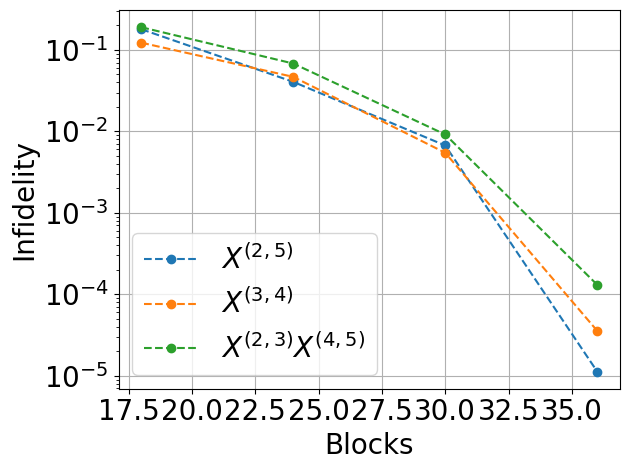

In [15]:
# plt.plot(X_gate_2_3.groupby(" N_blocks").mean()["fidelity"], label="(2,3)")
# plt.plot(X_gate_3_4.groupby(" N_blocks").mean()["fidelity"], label="(3,4)")
# plt.plot(X_gate_2_3_and_4_5.groupby(" N_blocks").mean()["fidelity"], label="[(2,3),(4,5)]")
plt.plot([18,24,30,36],X_gate_2_5.groupby("blocks").min()["fidelity"], label=r"$X^{(2,5)}$", marker="o", linestyle='dashed')
plt.plot([18,24,30,36],X_gate_3_4.groupby("blocks").min()["fidelity"], label=r"$X^{(3,4)}$", marker="o", linestyle='dashed')
plt.plot([18,24,30,36],X_gate_2_3_and_4_5.groupby("blocks").min()["fidelity"], label=r"$X^{(2,3)}X^{(4,5)}$", marker="o", linestyle='dashed')
plt.yscale("log")
plt.ylabel("Infidelity", fontsize=20)
plt.xlabel("Blocks", fontsize=20)
plt.legend(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.grid()

plt.tight_layout()
plt.savefig("ECD_STATE_DEPENDENCY.pdf")
plt.show()